##### Loading the required packages

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

##### Loading the Q1 sample CRASH dataset for further analysis of features.

In [ ]:
# sheetname = ["CRASH", "PERSON", "VEHICLE", "EMS", "CIRCUM_PERSON", "CIRCUM_VEHICLE", "CIRCUM_ROAD", "CIRCUM_WEATHER"]
dateparse = lambda x: pd.datetime.strptime(x, '%m-%d-%Y %H:%M:%S')


def getData(filePath):
    crash = pd.read_excel(filePath, parse_dates={'datetime': ['ACC_DATE', 'ACC_TIME']},
                                  date_parser=dateparse,sheet_name = "CRASH",na_values=['?', -99999])
    person = pd.read_excel(filePath, sheet_name = "PERSON",na_values=['?', -99999])
    vehicle = pd.read_excel(filePath, sheet_name = "VEHICLE",na_values=['?', -99999])
    ems = pd.read_excel(filePath, sheet_name = "EMS",na_values=['?', -99999])
    circumperson = pd.read_excel(filePath, sheet_name = "CIRCUM_PERSON",na_values=['?', -99999])
    circumvehicle = pd.read_excel(filePath, sheet_name = "CIRCUM_VEHICLE",na_values=['?', -99999])
    circumroad = pd.read_excel(filePath, sheet_name = "CIRCUM_ROAD",na_values=['?', -99999])
    circumweather = pd.read_excel(filePath, sheet_name = "CIRCUM_WEATHER",na_values=['?', -99999])
    
    crash.join(person,on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="person")
    crash.join(vehicle, on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="vehicle")
    crash.join(ems, on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="ems")
    crash.join(circumperson,on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="circumperson")
    crash.join(circumvehicle, on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="circumvehicle")
    crash.join(circumroad, on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="circumroad")
    crash.join(circumweather, on='REPORT_NO', how='left',lsuffix="crash", rsuffix ="circumweather")
    
    return crash
    

data_Q1_CRASH = getData("./data/CrashData/Crash_Qtr01_2016.xlsx")
data_Q2_CRASH = getData("./data/CrashData/Crash_Qtr02_2016.xlsx")
data_Q3_CRASH = getData("./data/CrashData/Crash_Qtr03_2016.xlsx")
#data_Q1_CRASH = getData("./Maryland Data/Crash_Qtr01_2016.xlsx")
#data_Q1_CRASH = pd.read_excel("./data/CrashData/Crash_Qtr01_2016.xlsx", parse_dates={'datetime': ['ACC_DATE', 'ACC_TIME']},
#date_parser=dateparse,nrows=4, sheet_name = "CRASH",na_values=['?', -99999])
#data_Q2_CRASH = pd.read_excel("./data/CrashData/Crash_Qtr02_2016.xlsx", parse_dates={'datetime': ['ACC_DATE', 'ACC_TIME']},
#date_parser=dateparse,nrows=4, sheet_name = "CRASH",na_values=['?', -99999])
#data_Q3_CRASH = pd.read_excel("./data/CrashData/Crash_Qtr03_2016.xlsx", parse_dates={'datetime': ['ACC_DATE', 'ACC_TIME']},
#date_parser=dateparse,nrows=4, sheet_name = "CRASH",na_values=['?', -99999])
#data_Q4_CRASH = pd.read_excel("./data/CrashData/Crash_Qtr04_2016.xlsx", parse_dates={'datetime': ['ACC_DATE', 'ACC_TIME']},
#date_parser=dateparse,nrows=4, sheet_name = "CRASH",na_values=['?', -99999])

frames = [data_Q1_CRASH, data_Q2_CRASH, data_Q3_CRASH]
data = pd.concat(frames)
data.index = pd.to_datetime(data.datetime)
#del data["datetime"]
#data_Q1_CRASH.to_csv("data_Q1_CRASH.csv")
#data_Q2_CRASH.to_csv("data_Q2_CRASH.csv")
#data_Q3_CRASH.to_csv("data_Q3_CRASH.csv")
#data_Q4_CRASH.to_csv("data_Q4_CRASH.csv")
#data.to_csv("alldata.csv")

In [7]:
data.datetime

datetime
2016-02-16 11:09:00   2016-02-16 11:09:00
2016-01-11 08:14:00   2016-01-11 08:14:00
2016-02-15 20:56:00   2016-02-15 20:56:00
2016-03-23 07:33:00   2016-03-23 07:33:00
2016-01-20 13:08:00   2016-01-20 13:08:00
2016-02-03 07:50:00   2016-02-03 07:50:00
2016-02-24 15:10:00   2016-02-24 15:10:00
2016-01-21 03:00:00   2016-01-21 03:00:00
2016-03-19 04:05:00   2016-03-19 04:05:00
2016-01-18 14:00:00   2016-01-18 14:00:00
2016-01-30 02:21:00   2016-01-30 02:21:00
2016-01-12 01:01:00   2016-01-12 01:01:00
2016-03-13 16:58:00   2016-03-13 16:58:00
2016-01-29 08:25:00   2016-01-29 08:25:00
2016-03-18 08:20:00   2016-03-18 08:20:00
2016-03-20 08:54:00   2016-03-20 08:54:00
2016-01-25 16:07:00   2016-01-25 16:07:00
2016-02-01 23:27:00   2016-02-01 23:27:00
2016-02-24 16:20:00   2016-02-24 16:20:00
2016-02-25 23:33:00   2016-02-25 23:33:00
2016-01-06 19:00:00   2016-01-06 19:00:00
2016-01-03 13:22:00   2016-01-03 13:22:00
2016-03-19 11:35:00   2016-03-19 11:35:00
2016-01-20 23:00:00   201

In [ ]:
data.head

Text(0.5,1,u'Breakdown of Report Type for Accidents.')

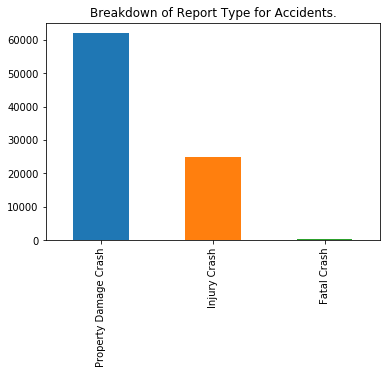

In [3]:
data["REPORT_TYPE"].value_counts().plot(kind='bar')
plt.title("Breakdown of Report Type for Accidents.")

Text(0.5,1,u'Breakdown of Accidents by County Info')

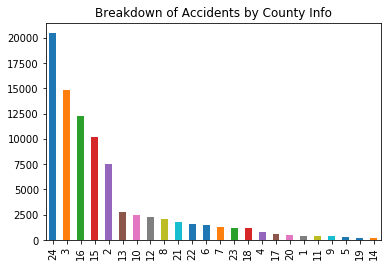

In [4]:
data["COUNTY_NO"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by County Info")

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


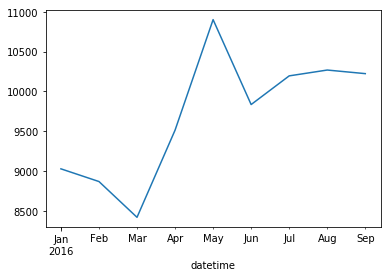

In [5]:
data["REPORT_TYPE"].resample('M', how='count').plot()
# Count of number of accidents with time. 

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


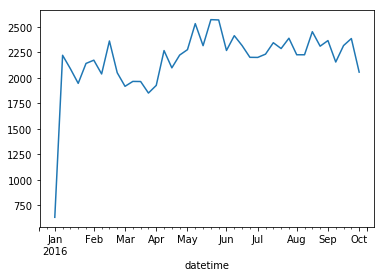

In [6]:
data["REPORT_TYPE"].resample('W', how='count').plot()
# Count of number of accidents with time. 

Text(0.5,1,u'Breakdown of Accidents by County Info')

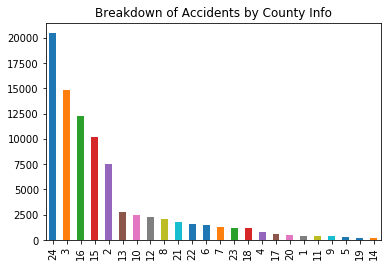

In [7]:

data["COUNTY_NO"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by County Info")

Text(0.5,1,u'Breakdown of Accidents by Hour')

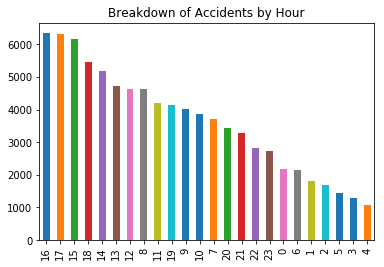

In [8]:
data['hour'] = data.index.hour
data["hour"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Hour")

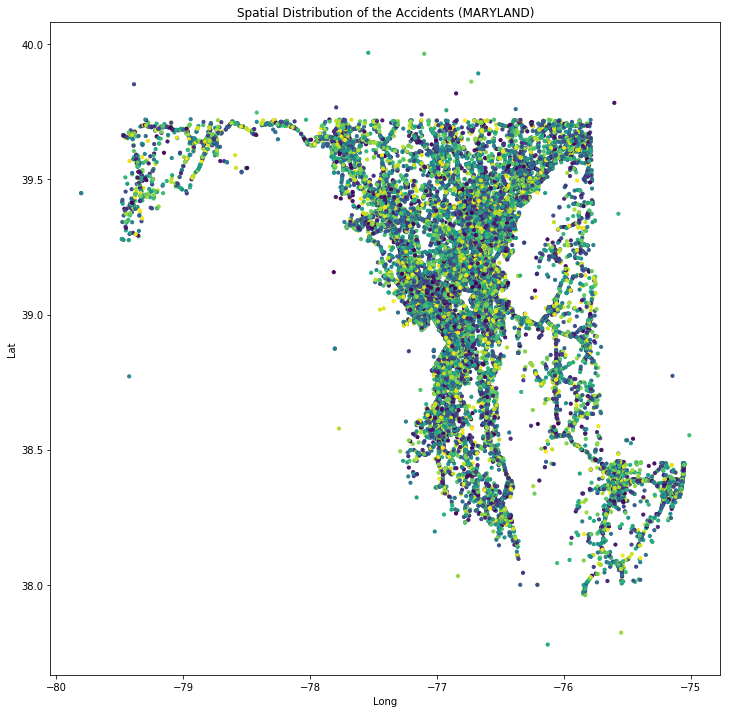

In [9]:
## Plot the accidents information from LatLong.
#temp = data_Q1_CRASH[data_Q1_CRASH["REPORT_TYPE"] != "Property Damage Crash"]
temp = data
colors = np.random.rand(temp.shape[0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 12), dpi=80)
plt.scatter(temp["LONGITUDE"],temp["LATITUDE"],c=colors,s=10)
plt.title("Spatial Distribution of the Accidents (MARYLAND)")
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()

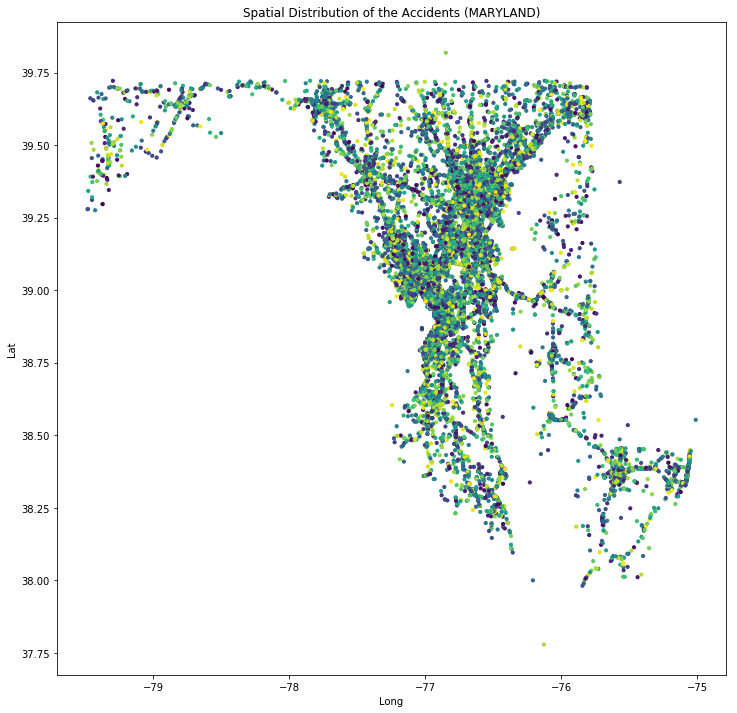

In [10]:
## Plot the accidents information from LatLong.
temp = data[data["REPORT_TYPE"] != "Property Damage Crash"]
#temp = data_Q1_CRASH
colors = np.random.rand(temp.shape[0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 12), dpi=80)
plt.scatter(temp["LONGITUDE"],temp["LATITUDE"],c=colors,s=10)
plt.title("Spatial Distribution of the Accidents (MARYLAND)")
plt.xlabel("Long")
plt.ylabel("Lat")
plt.show()

For the plot it looks like it as mostly spread around all the state...

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


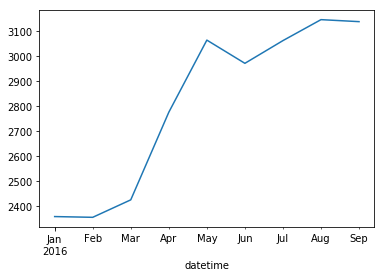

In [11]:
temp["REPORT_TYPE"].resample('M', how='count').plot()
# Count of number of accidents with time. 

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  if __name__ == '__main__':


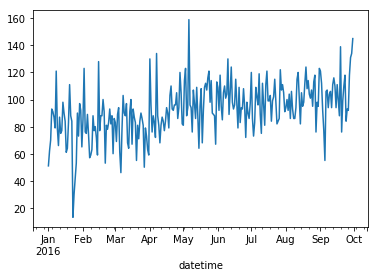

In [12]:
temp["REPORT_TYPE"].resample('D', how='count').plot()
# Count of number of accidents with time. 

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0.5,1,u'Breakdown of Accidents by Hour')

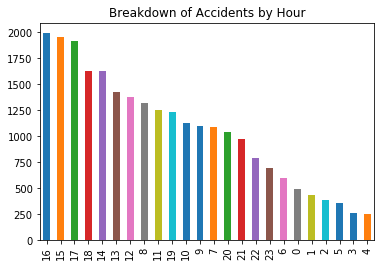

In [13]:
temp['hour'] = temp.index.hour
temp["hour"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Hour")

Text(0.5,1,u'Breakdown of Accidents by WeekDay')

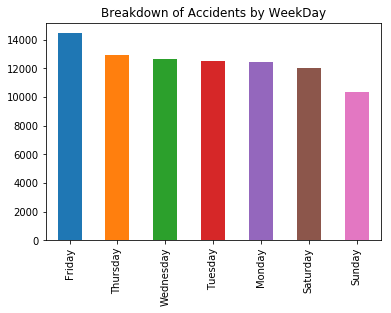

In [14]:
data['weekday'] = data.index.weekday_name
data["weekday"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by WeekDay")

#### This code is not used as we are not mapping accidents to Grid Cells

import shapefile as shp
import math

minx,maxx,miny,maxy = -80,-74,37.75,39.75
dx = .1
dy = .1

nx = int(math.ceil(abs(maxx - minx)/dx))
ny = int(math.ceil(abs(maxy - miny)/dy))

w = shp.Writer(shp.POLYGON)
w.autoBalance = 1
w.field("ID")
id=0

for i in range(ny):
    for j in range(nx):
        id+=1
        vertices = []
        parts = []
        vertices.append([min(minx+dx*j,maxx),max(maxy-dy*i,miny)])
        vertices.append([min(minx+dx*(j+1),maxx),max(maxy-dy*i,miny)])
        vertices.append([min(minx+dx*(j+1),maxx),max(maxy-dy*(i+1),miny)])
        vertices.append([min(minx+dx*j,maxx),max(maxy-dy*(i+1),miny)])
        parts.append(vertices)
        w.poly(parts)
        w.record(id)

w.save('grid.shp')

import geopandas as gpd
shapefilepath = "./grid.shp"
gridsLayer = gpd.read_file(shapefilepath)
f, ax = plt.subplots(1, figsize=(12, 12))
ax = gridsLayer.plot(axes=ax,colormap='Greens')
plt.show()

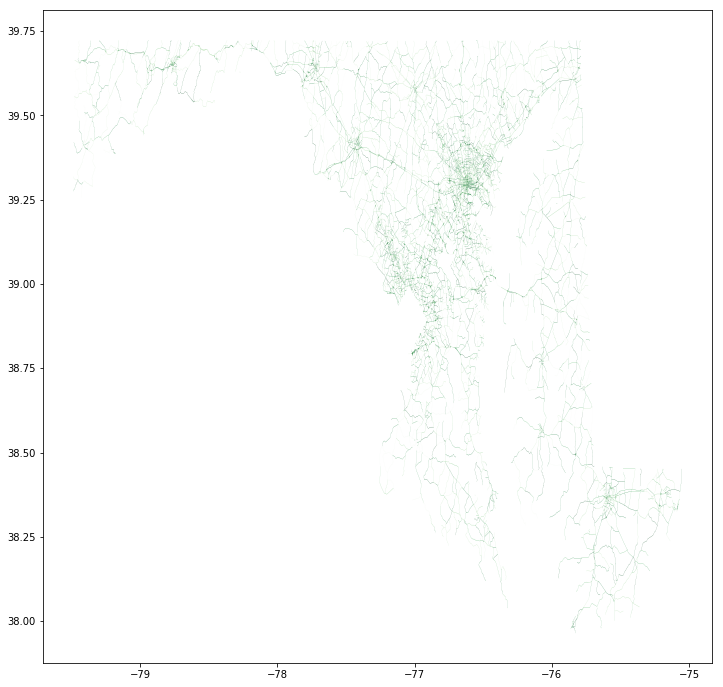

In [52]:
import geopandas as gpd
shapefilepath = "./data/BufferedRoadNetwork/buffer3.shp"
roadnetworkwithbuffer = gpd.read_file(shapefilepath)
f, ax = plt.subplots(1, figsize=(12, 12))
ax = roadnetworkwithbuffer.plot(axes=ax,colormap='Greens')
plt.show()

In [16]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(data.LONGITUDE, data.LATITUDE)]
#data = data.drop(['LONGITUDE', 'LATITUDE'], axis=1)
crs = {'init': 'epsg:4326'}
accidents_data = gpd.GeoDataFrame(data, crs=crs, geometry=geometry)

In [17]:
gridsLayer.crs = {'init' :'epsg:4326'}

In [60]:
from geopandas.tools import sjoin
crash_WithRoadInfo = sjoin(accidents_data,roadnetworkwithbuffer, how="inner", op='intersects')

In [66]:
print accidents_data.shape
print crash_WithRoadInfo.shape
print roadnetworkwithbuffer.shape

(87263, 38)
(94157, 124)
(10581, 86)


Text(0.5,1,u"Breakdown of Accidents by Road's")

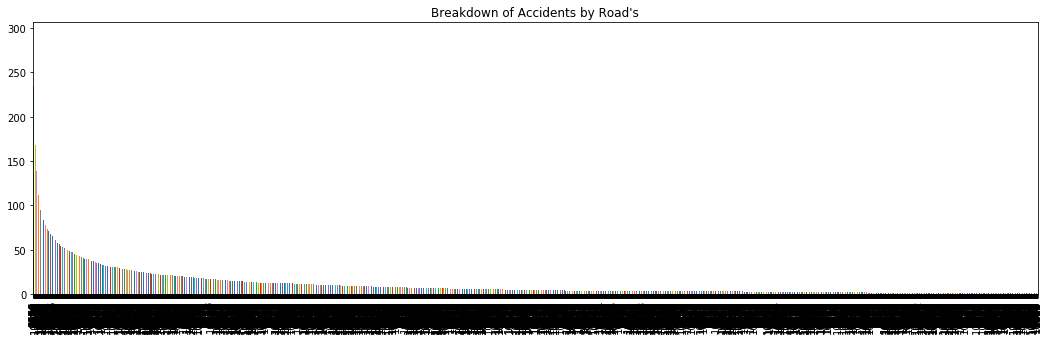

In [68]:
plt.figure(figsize=(18, 5), dpi=80)
crash_WithRoadInfo["OBJECT_ID"].value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Road's")

Text(0.5,1,u"Breakdown of Accidents by Road's")

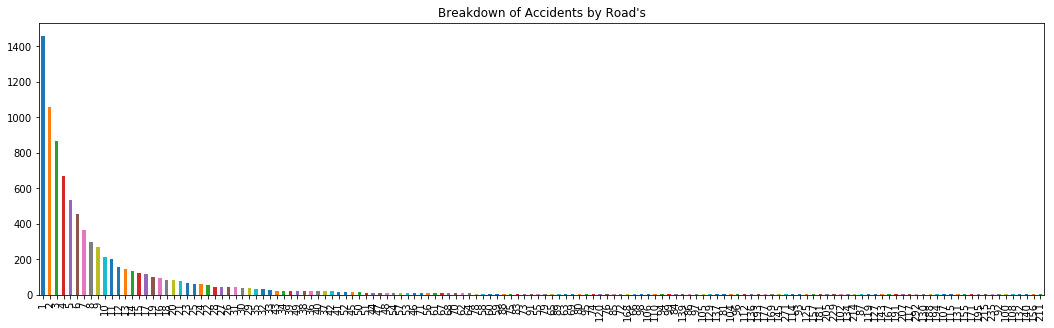

In [69]:
plt.figure(figsize=(18, 5), dpi=80)
crash_WithRoadInfo["OBJECT_ID"].value_counts().value_counts().plot(kind='bar')
plt.title("Breakdown of Accidents by Road's")

In [72]:
featuresSet = crash_WithRoadInfo[[from pandas.tools import plotting
plotting.scatter_matrix(featuresSet[["LIGHT_CODE",
"JUNCTION_CODE","COLLISION_TYPE_CODE",
"SURF_COND_CODE","LANE_CODE",
"RD_COND_CODE","RD_DIV_CODE",
"FIX_OBJ_CODE","WEATHER_CODE",
"LOC_CODE","SIGNAL_FLAG",
"C_M_ZONE_FLAG","AGENCY_CODE",
"AREA_CODE","HARM_EVENT_CODE1",
"HARM_EVENT_CODE2","LATITUDE",
"LONGITUDE","hour",
"weekday","geometry",
"index_right","OBJECT_ID",
"LOCATION_I","FUNC_CLASS",
"FUNC_CLA_1","FUNC_CLA_2",
"RURAL_URBA","AADT",
"AAWDT","MOTORCYCLE",
"CAR_AADT","LIGHT_TRUC",
"BUS_AADT","SINGLE_UNI",
"COMBINATIO","NUM_LANES"]]

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1773ef450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a9c28550>]], dtype=object)

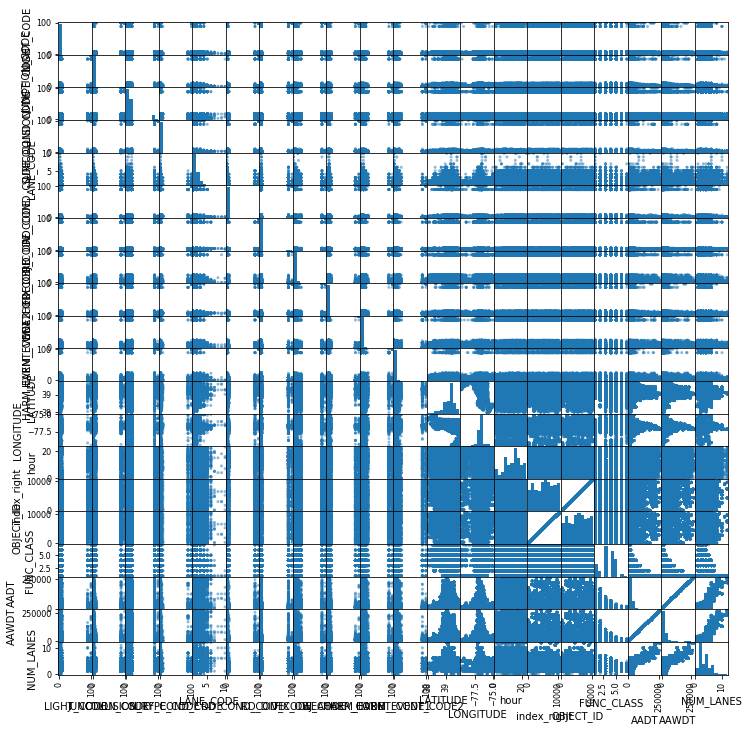

In [74]:
from pandas.tools import plotting
plotting.scatter_matrix(featuresSet[["LIGHT_CODE",
"JUNCTION_CODE","COLLISION_TYPE_CODE",
"SURF_COND_CODE","LANE_CODE",
"RD_COND_CODE","RD_DIV_CODE",
"FIX_OBJ_CODE","WEATHER_CODE",
"LOC_CODE","SIGNAL_FLAG",
"C_M_ZONE_FLAG","AGENCY_CODE",
"AREA_CODE","HARM_EVENT_CODE1",
"HARM_EVENT_CODE2","LATITUDE",
"LONGITUDE","hour",
"weekday","geometry",
"index_right","OBJECT_ID",
"LOCATION_I","FUNC_CLASS",
"FUNC_CLA_1","FUNC_CLA_2",
"RURAL_URBA","AADT",
"AAWDT","MOTORCYCLE",
"CAR_AADT","LIGHT_TRUC",
"BUS_AADT","SINGLE_UNI",
"COMBINATIO","NUM_LANES"]],figsize=(12, 12))

/Users/212475040/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121726850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12388ee10>]], dtype=object)

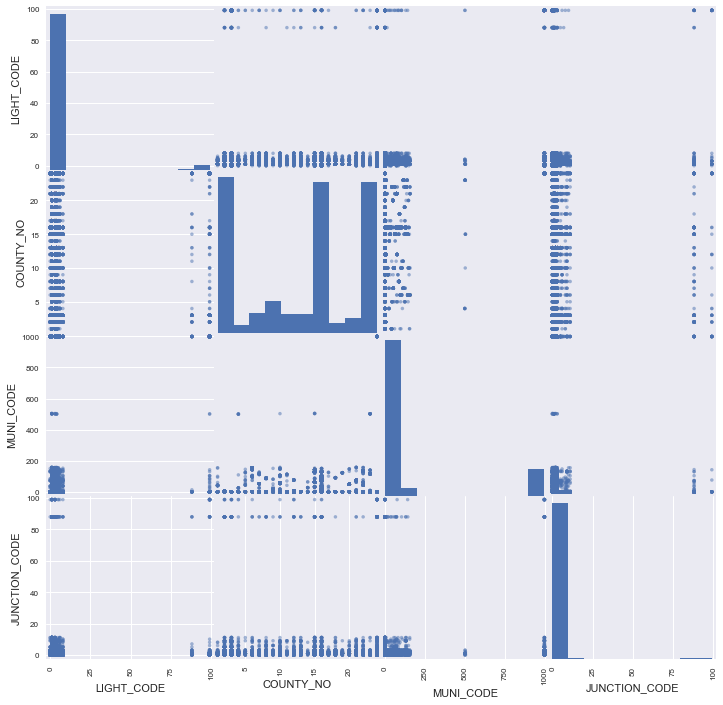

In [56]:
from pandas.tools import plotting
plotting.scatter_matrix(data_Q1_CRASH[["LIGHT_CODE", "COUNTY_NO", "MUNI_CODE", "JUNCTION_CODE"]],figsize=(12, 12))

In [59]:
### Analysis of LIGHT_CODE

#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 

print pd.value_counts(data_Q1_CRASH["LIGHT_CODE"])
data_Q1_CRASH["LIGHT_CODE_Coded"] = coding(data_Q1_CRASH["LIGHT_CODE"], {0:"Not Applicable",
                                                                         1:"Daylight",
                                                                        3:"Dark Lights On",
                                                                        4:"Dark No Lights",
                                                                        5:"Dawn",
6:"Dusk",
7:"Dark - Unknown Lighting",
88:"Other",
99:"Unknown"})
print '\nAfter Coding:'
print pd.value_counts(data_Q1_CRASH["LIGHT_CODE_Coded"])

1.00     14196
3.00      6904
4.00      2115
6.02       826
99.00      709
5.02       644
7.88       453
0.00       403
88.00       77
Name: LIGHT_CODE, dtype: int64

After Coding:
Daylight          14196
Dark Lights On     6904
Dark No Lights     2115
6.02                826
Unknown             709
5.02                644
7.88                453
Not Applicable      403
Other                77
Name: LIGHT_CODE_Coded, dtype: int64
